<a href="https://colab.research.google.com/github/RSeth-Creator/Data/blob/dataScience/DL_Binary_Classification_pima_indians_diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
data_path="/content/gdrive/MyDrive/Semester_III/DeepLearning/pima-indians-diabetes.csv"
data = pd.read_csv(data_path,header=None)


In [10]:
Column_Names=['No_Preg','Plasma','BP','Skin_Thickness','Insulin','BMI','Pedigree','Age','Class']
data.columns = Column_Names

In [11]:
data.head()

,No_Preg,Plasma,BP,Skin_Thickness,Insulin,BMI,Pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


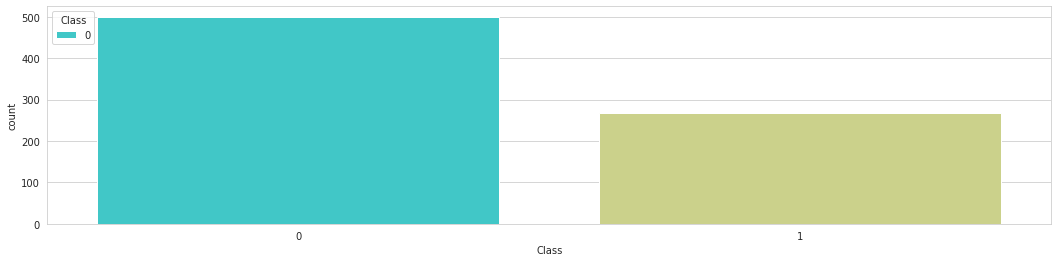

In [13]:
#Distribution of the classes
sns.set_style('whitegrid')
plt.figure(figsize=(18, 4))
sns.countplot(x=data['Class'],data=data,palette='rainbow')
plt.legend(title='Class', loc='upper left', labels=['0', '1'])


In [14]:
#5-Point summary 
data.describe()

,No_Preg,Plasma,BP,Skin_Thickness,Insulin,BMI,Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


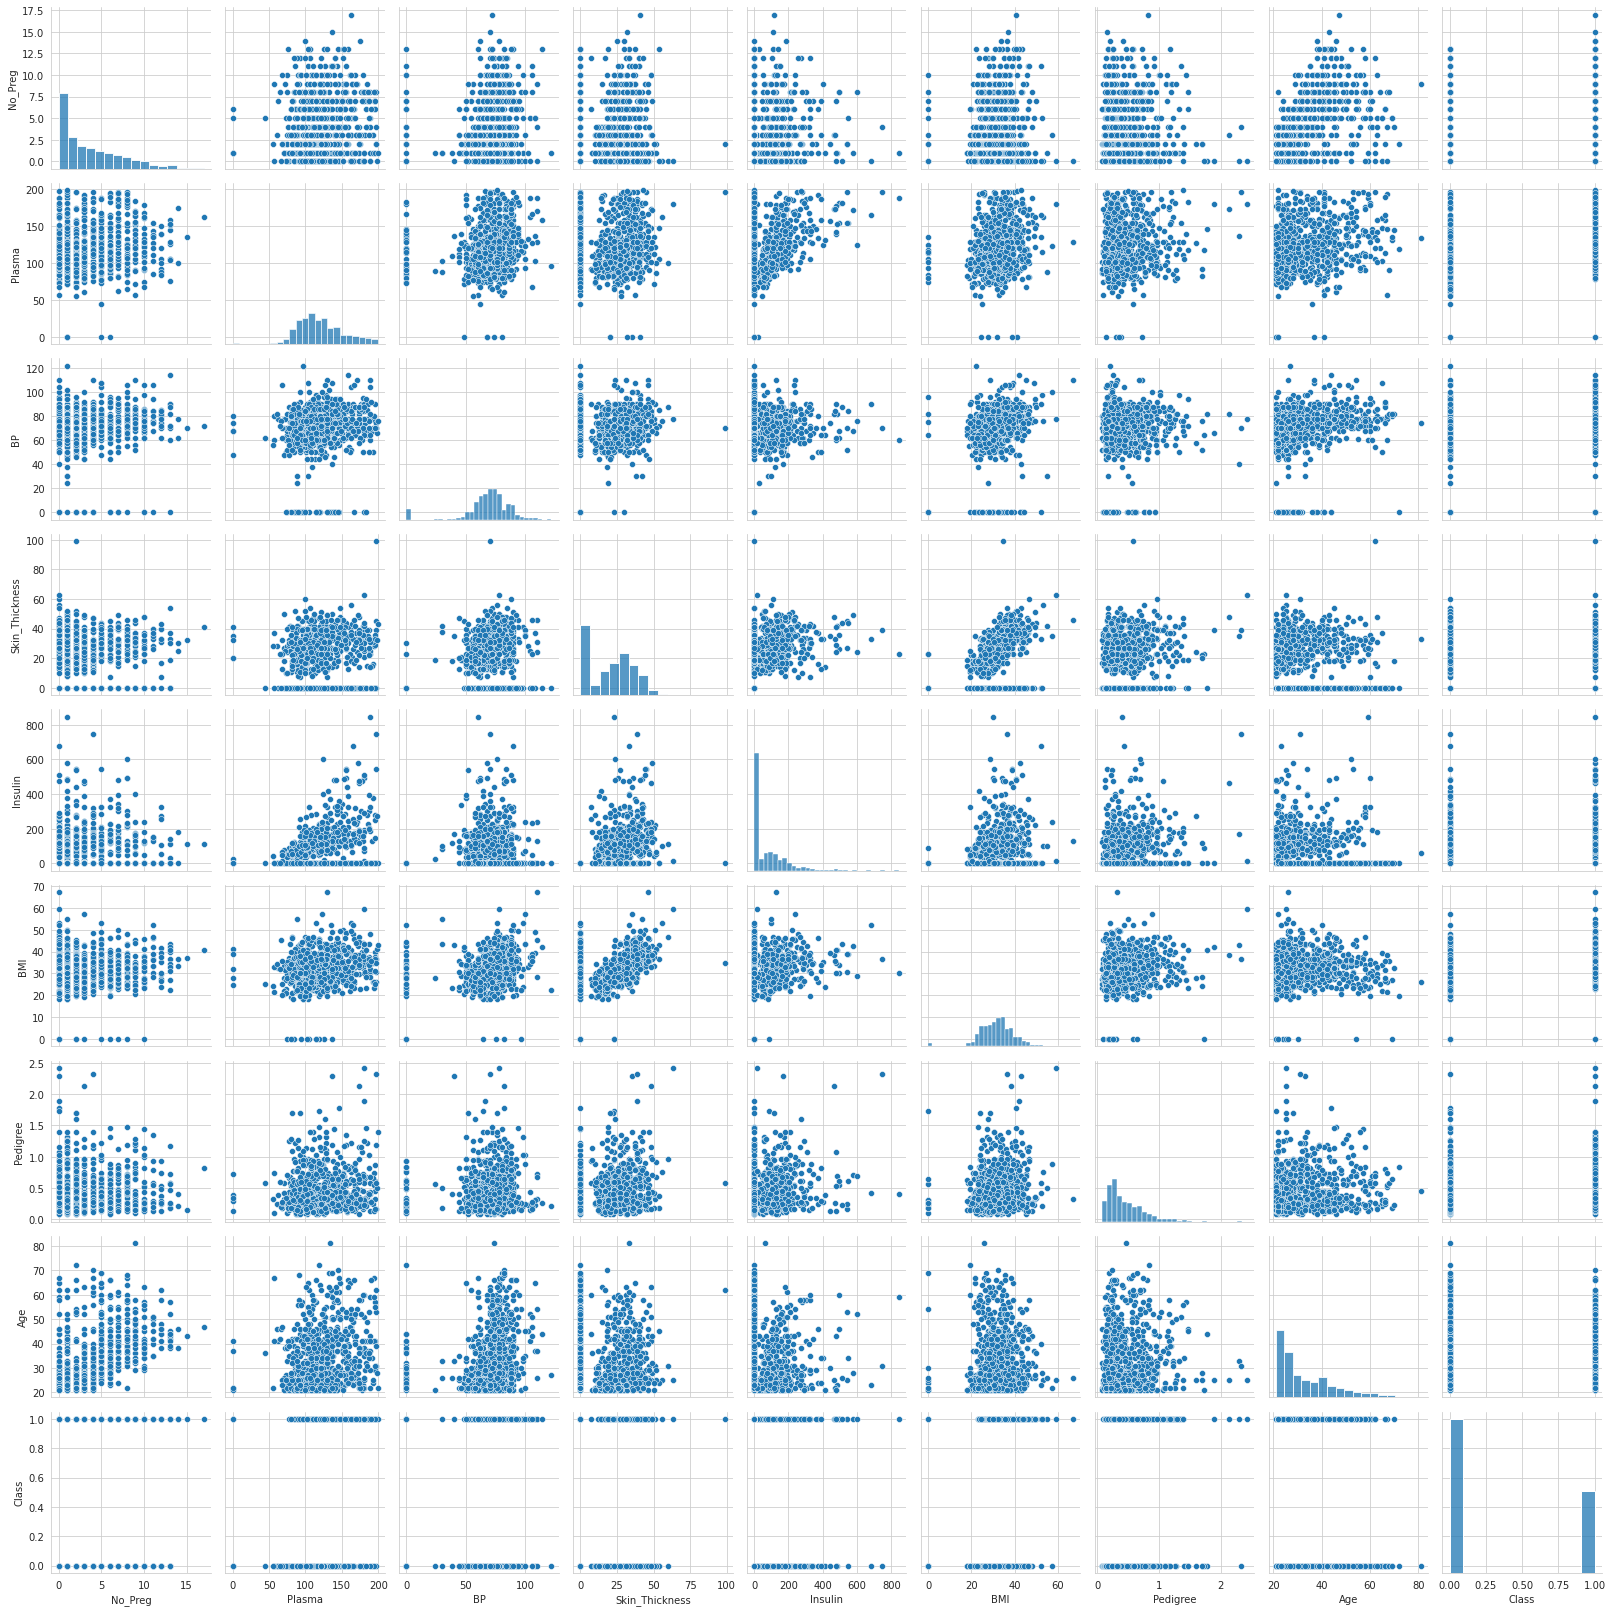

In [15]:
# Calculate and show pairplot
sns.pairplot(data, size=2.5)
plt.tight_layout()

In [17]:
#Selecting the features
X = data.drop(['Class'],axis=1) 

In [18]:
#Selecting the targets
Y = data['Class'] 

In [19]:
#Splitting into testing and training dataset
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.10,random_state =2)

In [20]:
#Importing required libraries for the Deep learning model
import tensorflow as tf
import tensorflow 

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout


In [24]:
#Creating the model for classification
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(1,8)),
    keras.layers.Dense(16, activation=tf.nn.relu),
	  keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),

])

In [25]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [26]:
#Training
model.fit(x_train, y_train, epochs=50, batch_size=1)
test_loss, test_acc = model.evaluate(x_test, y_test)

Epoch 1/50
691/691 [==============================] - 2s 1ms/step - loss: 1.6388 - accuracy: 0.5890
Epoch 2/50
691/691 [==============================] - 1s 1ms/step - loss: 0.8851 - accuracy: 0.6411
Epoch 3/50
691/691 [==============================] - 1s 1ms/step - loss: 0.8550 - accuracy: 0.6295
Epoch 4/50
691/691 [==============================] - 1s 1ms/step - loss: 0.8280 - accuracy: 0.6382
Epoch 5/50
691/691 [==============================] - 1s 1ms/step - loss: 0.7757 - accuracy: 0.6425
Epoch 6/50
691/691 [==============================] - 1s 1ms/step - loss: 0.7667 - accuracy: 0.6440
Epoch 7/50
691/691 [==============================] - 1s 1ms/step - loss: 0.7460 - accuracy: 0.6498
Epoch 8/50
691/691 [==============================] - 1s 1ms/step - loss: 0.7294 - accuracy: 0.6570
Epoch 9/50
691/691 [==============================] - 1s 2ms/step - loss: 0.6699 - accuracy: 0.6671
Epoch 10/50
691/691 [==============================] - 1s 2ms/step - loss: 0.6393 - accuracy: 0.6831

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [29]:
#MSE & RMSE
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions = model.predict(x_test)
print(mean_absolute_error(y_test,predictions))
print(np.sqrt(mean_squared_error(y_test,predictions)))


0.31976533826295434
0.3959172967582319
